<a href="https://colab.research.google.com/github/rajy4683/EIP_Session3/blob/master/Session3_Assign6_8284.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D,Conv2D, SeparableConv2D, DepthwiseConv2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils

Using TensorFlow backend.


In [0]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

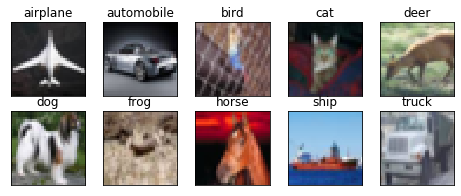

In [0]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

In [0]:
num_classes

10

In [0]:
# Define the model
model = Sequential()
model.add(Convolution2D(48, 3, 3, border_mode='same', input_shape=(32, 32, 3)))
model.add(Activation('relu'))
model.add(Convolution2D(48, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Convolution2D(96, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(96, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Convolution2D(192, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(192, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3), input_shape=(32, 32, 3..., padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3))`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3), padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3))`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(192, (3, 3), padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` 

In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 48)        1344      
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 48)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 48)        20784     
_________________________________________________________________
activation_2 (Activation)    (None, 30, 30, 48)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 48)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 48)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 96)       

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=50)`
  if sys.path[0] == '':





Epoch 1/50





390/390 [==============================] - 10s 24ms/step - loss: 1.8639 - acc: 0.2898 - val_loss: 1.4342 - val_acc: 0.4749
Epoch 2/50
390/390 [==============================] - 7s 17ms/step - loss: 1.3465 - acc: 0.5140 - val_loss: 1.1198 - val_acc: 0.5902
Epoch 3/50
390/390 [==============================] - 7s 17ms/step - loss: 1.1160 - acc: 0.6022 - val_loss: 0.9995 - val_acc: 0.6385
Epoch 4/50
390/390 [==============================] - 7s 17ms/step - loss: 0.9796 - acc: 0.6556 - val_loss: 0.8573 - val_acc: 0.7005
Epoch 5/50
390/390 [==============================] - 7s 17ms/step - loss: 0.8709 - acc: 0.6980 - val_loss: 0.7770 - val_acc: 0.7367
Epoch 6/50
390/390 [==============================] - 7s 17ms/step - loss: 0.8101 - acc: 0.7209 - val_loss: 0.7753 - val_acc: 0.7357
Epoch 7/50
390/390 [==============================] - 7s 18ms/step - loss: 0.7419 - acc: 0.7459 - val_loss: 0.6999 - val_acc: 0.7617
Epoch 8/50
390/390 [==============================] - 7s 17m

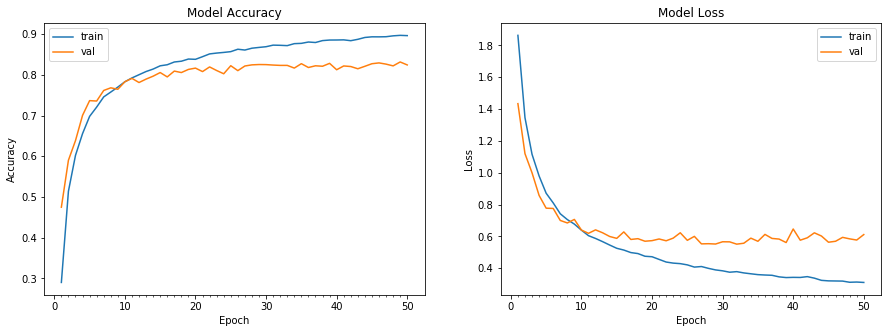

Accuracy on test data is: 82.44


In [0]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add, BatchNormalization
from keras.layers import Convolution2D, MaxPooling2D, GlobalAveragePooling2D, AveragePooling2D
from keras.utils import np_utils
from keras.utils import plot_model

from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
import numpy as np

In [0]:
# Define the model
model = Sequential()
drop_out_val=0.25
learning_rate_val=0.004

model.add(SeparableConv2D(64, kernel_size=(3, 3), strides=(1,1), padding="same", input_shape=(32, 32, 3), activation='relu',data_format="channels_last")) #Output=32x32x64 |RF=3
model.add(BatchNormalization())#Output=32x32x64 |RF=3
#model.add(Dropout(drop_out_val))


#model.add(AveragePooling2D())
model.add(SeparableConv2D(64, kernel_size=(3, 3), strides=(1,1), padding="same", activation='relu',data_format="channels_last")) #Output=32x32x64 |RF=3
model.add(BatchNormalization())#Output=32x32x64 |RF=3
model.add(Dropout(drop_out_val))#Output=32x32x64 |RF=3

model.add(SeparableConv2D(64, kernel_size=(3, 3), strides=(1,1), padding="same", activation='relu',data_format="channels_last")) #Output=32x32x64 |RF=7
model.add(BatchNormalization())#Output=32x32x64 |RF=7
model.add(Dropout(drop_out_val))#Output=32x32x64 |RF=7

#model.add(SeparableConv2D(64, kernel_size=(3, 3), strides=(2,2),    activation='relu',data_format="channels_last"))
#model.add(BatchNormalization())
#model.add(Dropout(drop_out_val))

#model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(AveragePooling2D())                   #Output=16x16x64 |RF=8

model.add(SeparableConv2D(128, kernel_size=(3, 3), strides=(1,1), padding="same",  activation='relu',data_format="channels_last")) #Output=16x16x128 |RF=12
model.add(BatchNormalization())#Output=16x16x128 |RF=12
model.add(Dropout(drop_out_val))#Output=16x16x128 |RF=12

model.add(SeparableConv2D(128, kernel_size=(3, 3), strides=(1,1),  padding="same", activation='relu',data_format="channels_last")) #Output=16x16x128 |RF=16
model.add(BatchNormalization())#Output=16x16x128 |RF=16
model.add(Dropout(drop_out_val))#Output=16x16x128 |RF=16

model.add(SeparableConv2D(128, kernel_size=(3, 3), strides=(1,1),  padding="same", activation='relu',data_format="channels_last")) #Output=16x16x128 |RF=20
model.add(BatchNormalization())#Output=16x16x128 |RF=20
model.add(Dropout(drop_out_val))#Output=16x16x128 |RF=20


#model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(AveragePooling2D())
model.add(SeparableConv2D(10, kernel_size=(3, 3), strides=(2,2),   activation='relu',data_format="channels_last")) #Output=7x7x10 |RF=24
model.add(BatchNormalization())#Output=7x7x10 |RF=24
model.add(Dropout(drop_out_val))#Output=7x7x10 |RF=24


model.add(AveragePooling2D()) #Output=3x3 |RF=28
model.add(SeparableConv2D(10, kernel_size=(3, 3), strides=(1,1),   activation='relu',data_format="channels_last")) #Output=1x1x10 |RF=44
#model.add(BatchNormalization())



#model.add(BatchNormalization())
#model.add(Dropout(drop_out_val))

#model.add(AveragePooling2D())
#model.add(AveragePooling2D())
#model.add(MaxPooling2D(pool_size=(2, 2)))

#model.add(Convolution2D(10, 1, activation='relu'))
#model.add(Convolution2D(10, 30, activation='relu'))

model.add(Flatten()) #Output 10
model.add(Activation('softmax'))#Output 10
# Compile the model
#model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.compile(optimizer=Adam(lr=learning_rate_val), loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
plot_model(model, 'latest.png', show_shapes=True)

In [0]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
separable_conv2d_1 (Separabl (None, 32, 32, 64)        283       
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
separable_conv2d_2 (Separabl (None, 32, 32, 64)        4736      
_________________________________________________________________
batch_normalization_2 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
dropout_6 (Dropout)          (None, 32, 32, 64)        0         
_________________________________________________________________
separable_conv2d_3 (Separabl (None, 32, 32, 64)        4736      
_________________________________________________________________
batch_normalization_3 (Batch (None, 32, 32, 64)       

In [0]:
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
import numpy as np
lr_change_array = []


def scheduler(epoch, lr):
  #new_lr = round(learning_rate_val * 1/(1 + 0.309 * epoch), 10)
  if (epoch <= 30):
      new_lr = round(learning_rate_val * 1/(1 + 0.309 * epoch), 10)
  else:
      new_lr = round(learning_rate_val * 1/(1 + 0.289 * epoch), 10)

  #new_lr = round(learning_rate_val * 1/(1 + 0.300 * epoch), 10)
  return new_lr 
  #round(learning_rate_val * 1/(1 + 0.300 * epoch), 10) 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  This is separate from the ipykernel package so we can avoid doing imports until


Train on 50000 samples, validate on 10000 samples
Epoch 1/50

Epoch 00001: LearningRateScheduler setting learning rate to 0.004.
50000/50000 [==============================] - 15s 299us/step - loss: 1.5152 - acc: 0.4472 - val_loss: 1.5122 - val_acc: 0.5209
Epoch 2/50

Epoch 00002: LearningRateScheduler setting learning rate to 0.0030557678.
50000/50000 [==============================] - 13s 255us/step - loss: 1.0020 - acc: 0.6439 - val_loss: 1.0505 - val_acc: 0.6405
Epoch 3/50

Epoch 00003: LearningRateScheduler setting learning rate to 0.0024721879.
50000/50000 [==============================] - 13s 258us/step - loss: 0.8451 - acc: 0.7025 - val_loss: 0.9287 - val_acc: 0.6874
Epoch 4/50

Epoch 00004: LearningRateScheduler setting learning rate to 0.0020757654.
50000/50000 [==============================] - 13s 256us/step - loss: 0.7637 - acc: 0.7350 - val_loss: 0.8040 - val_acc: 0.7280
Epoch 5/50

Epoch 00005: LearningRateScheduler setting learning rate to 0.0017889088.
50000/50000 [==

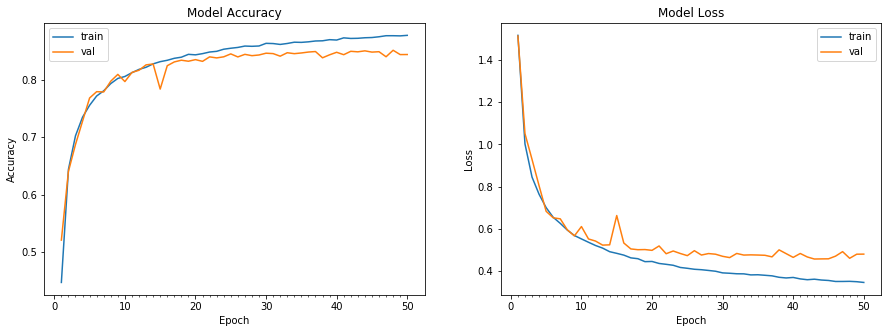

Accuracy on test data is: 84.41


In [0]:
history = [0] *20
start_check_model = time.time()
history[0] = model.fit(train_features, train_labels, batch_size=128, nb_epoch=50, verbose=1,validation_data=(test_features, test_labels),callbacks=[LearningRateScheduler(scheduler, verbose=1)])
end_check_model = time.time()


print ("This Model took %0.2f seconds to train"%(end_check_model - start_check_model))
# plot model history
plot_model_history(history[0])
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

In [0]:
for layer in model.layers:
    print(layer.output.shape)

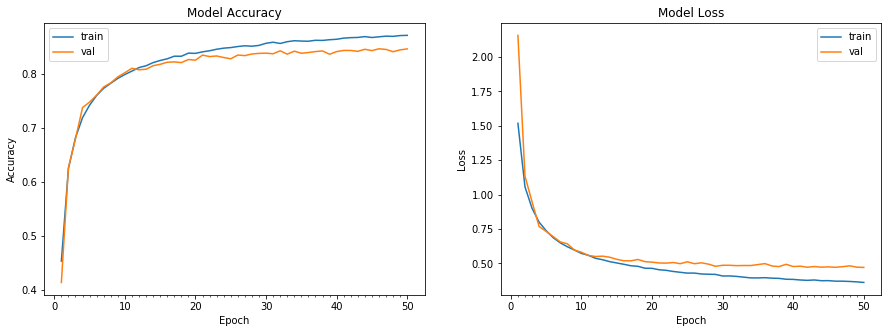

In [0]:
plot_model_history(history[0])

In [0]:
score = model.evaluate(test_features, test_labels, verbose=0)

In [0]:
print(score)

[0.48093768265247344, 0.8441]
